In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../data/student-mat.csv", sep=";")

In [5]:
print(df.shape)

(395, 33)


In [6]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label = LabelEncoder()

In [11]:
for col in df.select_dtypes(include='object').columns:
    df[col] = label.fit_transform(df[col])

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [15]:
import seaborn as sns

In [16]:
import matplotlib.pyplot as plt

<Axes: >

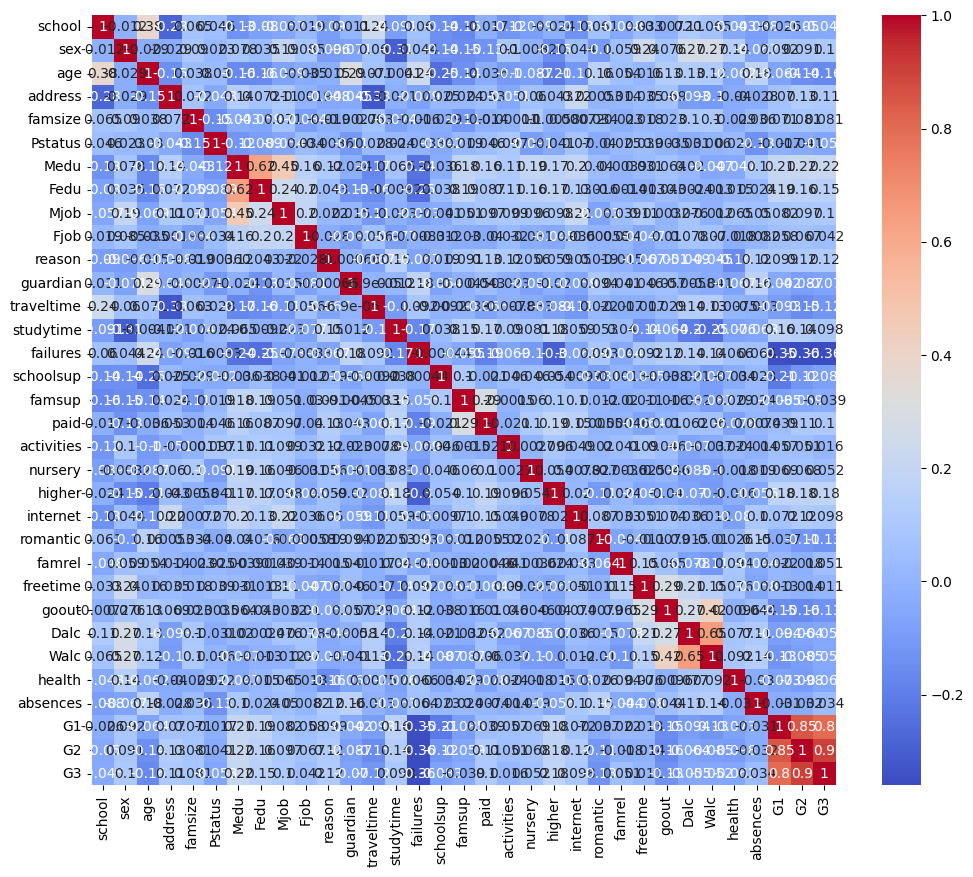

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
X = df.drop("G3", axis=1)
y = df["G3"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestRegressor()

In [24]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred = model.predict(X_test)

In [26]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8188842957834527


In [30]:
import numpy as np

In [31]:
mse = mean_squared_error(y_test, y_pred)

In [32]:
rmse = np.sqrt(mse)

In [33]:
print("RMSE:", rmse)

RMSE: 1.9271185941579638


In [35]:
sample_input = pd.DataFrame([{
    'school': 1, 'sex': 0, 'age': 17, 'address': 1, 'famsize': 1, 'Pstatus': 1,
    'Medu': 4, 'Fedu': 4, 'Mjob': 3, 'Fjob': 3, 'reason': 2, 'guardian': 1,
    'traveltime': 1, 'studytime': 2, 'failures': 0, 'schoolsup': 0, 'famsup': 1,
    'paid': 1, 'activities': 1, 'nursery': 1, 'higher': 1, 'internet': 1, 'romantic': 0,
    'famrel': 4, 'freetime': 3, 'goout': 3, 'Dalc': 1, 'Walc': 1, 'health': 5,
    'absences': 2, 'G1': 15, 'G2': 14
}])

In [36]:
prediction = model.predict(sample_input)

In [ ]:
print("🎯 Predicted Final Grade (G3):", round(prediction[0], 2))